In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Maths and Vectors
import pandas as pd
import numpy as np
import re

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ML
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/DOF__Summary_of_Neighborhood_Sales_in_Manhattan_for_Class_1-__2-_and_3-Family_homes_-_2008.csv")
df.head()

,NEIGHBORHOOD,TYPE OF HOME,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE
0,ALPHABET CITY,03 THREE FAMILY HOMES,2,3200000.0,3275000.0,3275000.0,3350000.0
1,CHELSEA,01 ONE FAMILY HOMES,1,3800000.0,3800000.0,3800000.0,3800000.0
2,CHELSEA,02 TWO FAMILY HOMES,1,4388888.0,4388888.0,4388888.0,4388888.0
3,CHELSEA,03 THREE FAMILY HOMES,2,4280000.0,4640000.0,4640000.0,5000000.0
4,CHINATOWN,02 TWO FAMILY HOMES,1,9425000.0,9425000.0,9425000.0,9425000.0


In [3]:
df.isnull().sum() / len(df) * 100

NEIGHBORHOOD          0.0
TYPE OF HOME          0.0
NUMBER OF SALES       0.0
LOWEST SALE PRICE     0.0
AVERAGE SALE PRICE    0.0
MEDIAN SALE PRICE     0.0
HIGHEST SALE PRICE    0.0
dtype: float64

<Axes: >

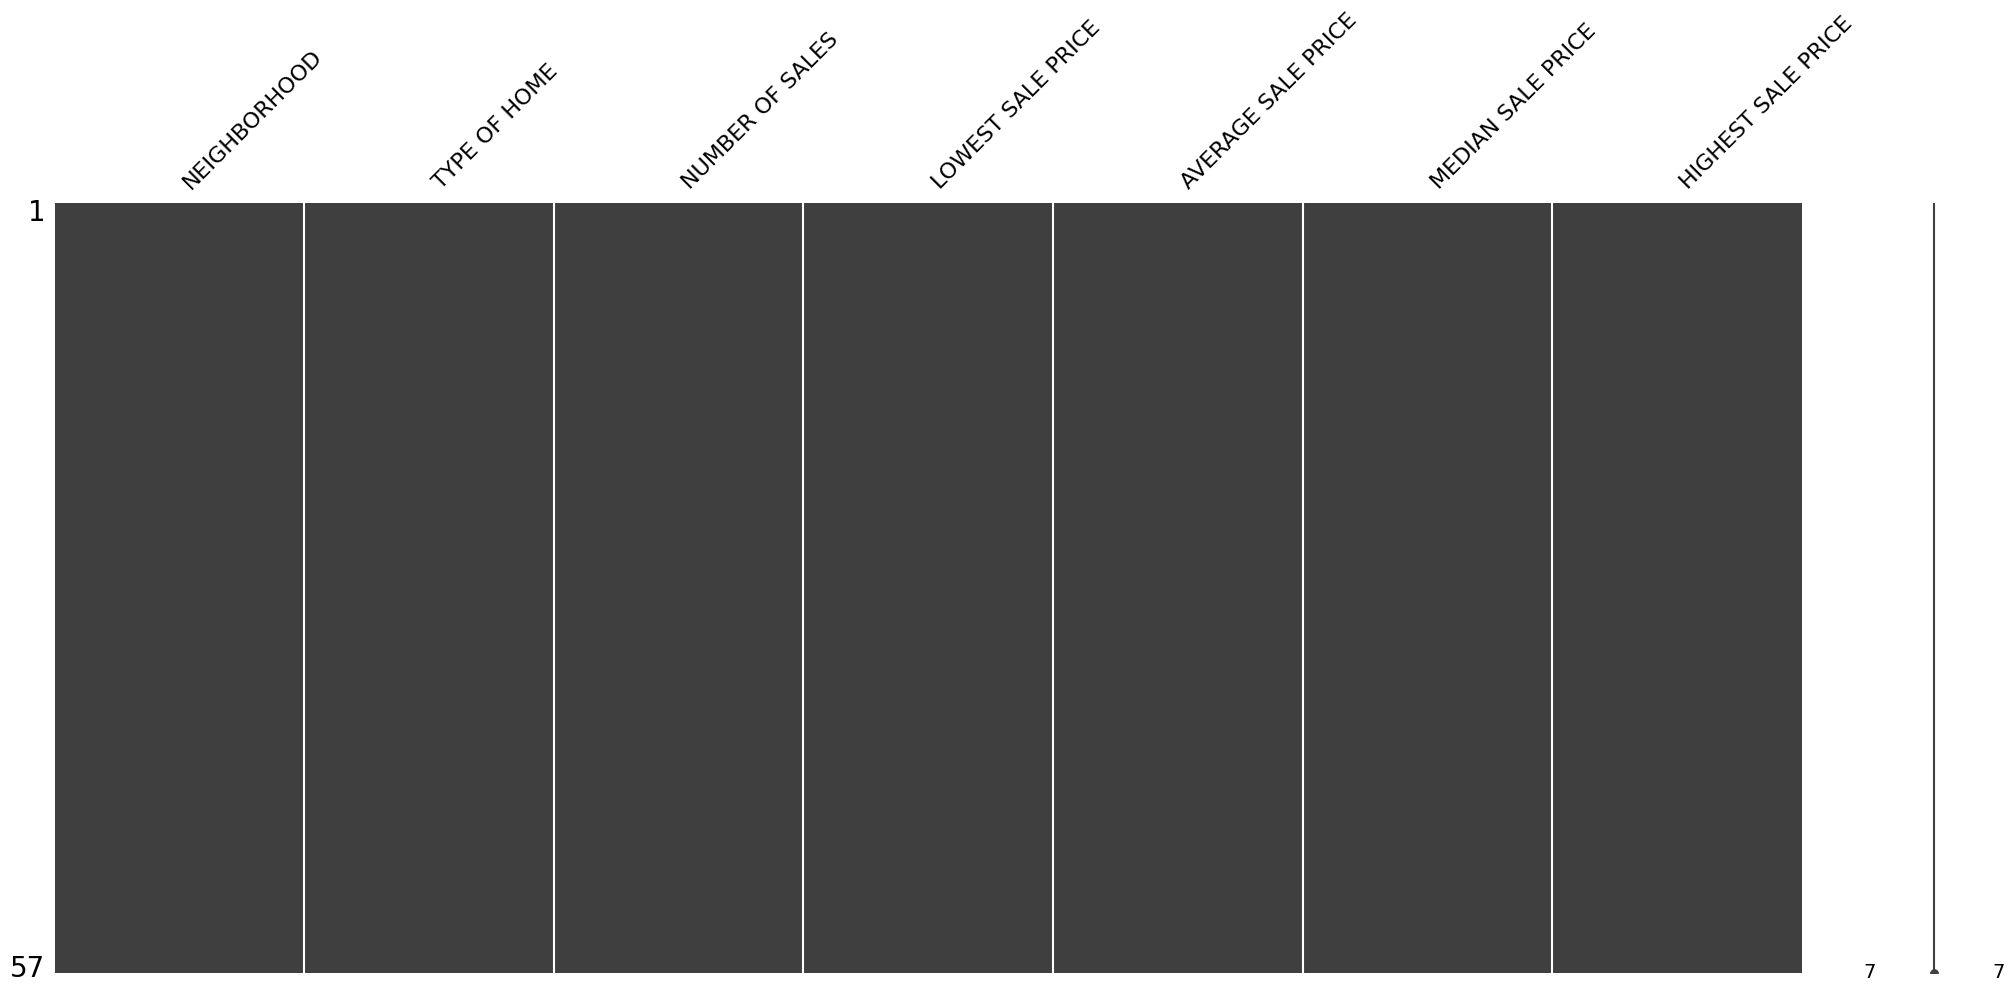

In [4]:
msno.matrix(df)

In [5]:
df.shape

(57, 7)

In [6]:
df.dtypes

NEIGHBORHOOD           object
TYPE OF HOME           object
NUMBER OF SALES         int64
LOWEST SALE PRICE     float64
AVERAGE SALE PRICE    float64
MEDIAN SALE PRICE     float64
HIGHEST SALE PRICE    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NEIGHBORHOOD        57 non-null     object 
 1   TYPE OF HOME        57 non-null     object 
 2   NUMBER OF SALES     57 non-null     int64  
 3   LOWEST SALE PRICE   57 non-null     float64
 4   AVERAGE SALE PRICE  57 non-null     float64
 5   MEDIAN SALE PRICE   57 non-null     float64
 6   HIGHEST SALE PRICE  57 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.2+ KB


In [8]:
df.describe()

,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE
count,57.0,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01
mean,3.0,3.477236e+06,4.782088e+06,4.567053e+06,6.884256e+06
std,3.5,2.928141e+06,3.849823e+06,3.596762e+06,8.435210e+06
min,1.0,1.750000e+05,2.000000e+05,2.000000e+05,2.000000e+05
25%,1.0,9.990000e+05,1.201754e+06,1.100000e+06,2.200000e+06
50%,2.0,3.450000e+06,4.388888e+06,4.388888e+06,4.388888e+06
75%,3.0,4.400000e+06,6.291667e+06,5.770000e+06,7.950000e+06
max,21.0,1.350000e+07,1.565500e+07,1.382500e+07,4.900000e+07


In [9]:
df = df.rename(columns = str.lower)
df.head()

,neighborhood,type of home,number of sales,lowest sale price,average sale price,median sale price,highest sale price
0,ALPHABET CITY,03 THREE FAMILY HOMES,2,3200000.0,3275000.0,3275000.0,3350000.0
1,CHELSEA,01 ONE FAMILY HOMES,1,3800000.0,3800000.0,3800000.0,3800000.0
2,CHELSEA,02 TWO FAMILY HOMES,1,4388888.0,4388888.0,4388888.0,4388888.0
3,CHELSEA,03 THREE FAMILY HOMES,2,4280000.0,4640000.0,4640000.0,5000000.0
4,CHINATOWN,02 TWO FAMILY HOMES,1,9425000.0,9425000.0,9425000.0,9425000.0


In [10]:
df["hometype"] = df["type of home"]
df.head()

,neighborhood,type of home,number of sales,lowest sale price,average sale price,median sale price,highest sale price,hometype
0,ALPHABET CITY,03 THREE FAMILY HOMES,2,3200000.0,3275000.0,3275000.0,3350000.0,03 THREE FAMILY HOMES
1,CHELSEA,01 ONE FAMILY HOMES,1,3800000.0,3800000.0,3800000.0,3800000.0,01 ONE FAMILY HOMES
2,CHELSEA,02 TWO FAMILY HOMES,1,4388888.0,4388888.0,4388888.0,4388888.0,02 TWO FAMILY HOMES
3,CHELSEA,03 THREE FAMILY HOMES,2,4280000.0,4640000.0,4640000.0,5000000.0,03 THREE FAMILY HOMES
4,CHINATOWN,02 TWO FAMILY HOMES,1,9425000.0,9425000.0,9425000.0,9425000.0,02 TWO FAMILY HOMES
